# Project: Fern

### Theory (source: [Wikipedia [1]](https://en.wikipedia.org/wiki/Barnsley_fern))

**The first point** drawn is at the origin (x0 = 0, y0 = 0) and then the new points are iteratively computed by randomly applying one of the following four coordinate transformations:[4][5]

ƒ1

    xn + 1 = 0
    yn + 1 = 0.16 yn.

This coordinate transformation is chosen 1% of the time and just maps any point to a point in the first line segment at the base of the stem. This part of the figure is the first to be completed during the course of iterations.


ƒ2

    xn + 1 = 0.85 xn + 0.04 yn
    yn + 1 = −0.04 xn + 0.85 yn + 1.6.
    
This coordinate transformation is chosen 85% of the time and maps any point inside the leaflet represented by the red triangle to a point inside the opposite, smaller leaflet represented by the blue triangle in the figure.

ƒ3

    xn + 1 = 0.2 xn − 0.26 yn
    yn + 1 = 0.23 xn + 0.22 yn + 1.6.
    
This coordinate transformation is chosen 7% of the time and maps any point inside the leaflet (or pinna) represented by the blue triangle to a point inside the alternating corresponding triangle across the stem (it flips it).

ƒ4

    xn + 1 = −0.15 xn + 0.28 yn
    yn + 1 = 0.26 xn + 0.24 yn + 0.44.
    
This coordinate transformation is chosen 7% of the time and maps any point inside the leaflet (or pinna) represented by the blue triangle to a point inside the alternating corresponding triangle across the stem (without flipping it).

The first coordinate transformation draws the stem. The second generates successive copies of the stem and bottom fronds to make the complete fern. The third draws the bottom frond on the left. The fourth draws the bottom frond on the right. The recursive nature of the IFS guarantees that the whole is a larger replica of each frond. Note that the complete fern is within the range −2.1820 < x < 2.6558 and 0 ≤ y < 9.9983.

Fern can be created by implementation of ```if loops``` and ```while loop```. We will discuss three different approaches to create fern.

### Method 1: Direct implementation 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import pandas as pd
%matplotlib inline
sns.set()

### Method-2 : Manual Matrix Multiplication

In this method we first define matrices. Then we will manually multiply these matrices to get desired plot of fern. This correspond to the following transformations:

\\( f_{1}(x,y)={\begin{bmatrix}\ 0.00 & \ 0.00\ \\\
                       0.00&\ 0.16\end{bmatrix}}{\begin{bmatrix}\ x \\\ y\end{bmatrix}} \\)

\\(  f_{2}(x,y)={\begin{bmatrix}\ 0.85&\ 0.04\ \\\ -0.04&\ 0.85\end{bmatrix}}{\begin{bmatrix}\ x \\\ y\end{bmatrix}}+{\begin{bmatrix}\ 0.00 \\\ 1.60\end{bmatrix}} \\)

\\(  f_{3}(x,y)={\begin{bmatrix}\ 0.20&\ -0.26\ \\\ 0.23&\ 0.22\end{bmatrix}}{\begin{bmatrix}\ x \\\ y\end{bmatrix}}+{\begin{bmatrix}\ 0.00 \\\ 1.60\end{bmatrix}} \\)

\\( f_{4}(x,y)={\begin{bmatrix}\ -0.15&\ 0.28\ \\\ 0.26&\ 0.24\end{bmatrix}}{\begin{bmatrix}\ x \\\ y\end{bmatrix}}+{\begin{bmatrix}\ 0.00 \\\ 0.44\end{bmatrix}} \\)

In [16]:
import numpy as np

- To define number of iteration.

In [16]:
ITR = 100000

- To define matrices using ```numpy```

In [17]:
x = np.array([[0.0,0.0] for k in range(ITR)])
A = np.array([[0.0,0.0],[0.0,0.16]])
B = np.array([[0.85,0.04],[-0.04,0.85]])
C = np.array([[0.20,-0.26],[0.23,0.22]])
D = np.array([[-0.15,0.28],[0.26,0.24]])
AD = np.array([[0.0,0.0],
             [0.0,1.6],
             [0.0,1.6],
             [0.0,0.44]])

- To implement transformation

In [18]:
X =[]
Y = []
x[0,0] = 0.0
x[0,1] = 0.0
t = 0
while t < ITR:
    ct = random.uniform(0,100)
    '''First condition'''
    if ct < 1.0:       
        for p in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + A[p,q]*x[t-1,q] 
                
                
        '''second condition'''            
    elif ct > 1.0 and ct < 86.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q in range(2):
                x[t,p] = x[t,p] + B[p,q]*x[t-1,q]    
        for  p in range(2):
            x[t,p] = x[t,p]  + AD[1,p]
            
            
        '''third condition'''                 
    elif ct > 86.0 and ct < 93.0:
        for p  in range(2):
            x[t,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + C[p,q]*x[t-1,q]      
        for p in range(2):
            x[t,p] = x[t,p]  + AD[2,p]
            
            
        '''fourth condition '''                 
    elif  ct > 93.0 and ct < 100.0:
        for p in range(2):
            x[1,p] = 0.0
            for q  in range(2):
                x[t,p] = x[t,p] + D[p,q]*x[t-1,q]       
        for p in range(2):
            x[t,p] = x[t,p]  + AD[3,p]

    X.append(x[t,0])
    Y.append(x[t,1])
    t = t +1



- To get the plot

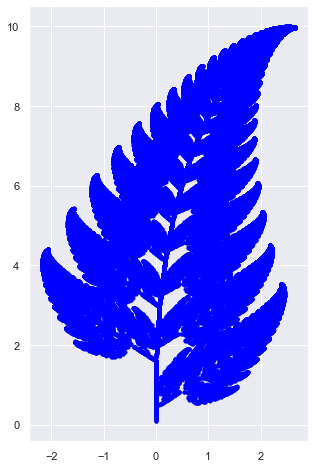

In [22]:
plt.figure(figsize = [5,8])
plt.scatter(X,Y,color = 'blue',marker = '.')
plt.show()

### Method 3-Numpy

 In this case we first define the matrices and implement ```numpy``` library to make products.

- To define Matrices

In [19]:
'''Matrices'''
A = np.array([[0.0,0.0],[0.0,0.16]])
B = np.array([[0.85,0.04],[-0.04,0.85]])
C = np.array([[0.20,-0.26],[0.23,0.22]])
D = np.array([[-0.15,0.28],[0.26,0.24]])
AD = np.array([[0.0,0.0],
             [0.0,1.6],
             [0.0,1.6],
             [0.0,0.44]])

- To implement transformation

In [22]:
u = np.array([0,0])
U = [u]
n = 1
while n < 1000:
    '''generate a random number'''
    r = random.uniform(0,100)
    
    '''1rst condition'''
    if r <  1.0:
        u = np.dot(A,u)
        U.append(u)
        
        '''second condition'''
    elif r > 1.0 and r < 86.0:
        u = np.dot(B,u) + AD[1]
        U.append(u)
        
        '''third condition'''
    elif r > 86.0 and r < 93.0:
        u = np.dot(C,u) + AD[2]
        U.append(u)
        
        '''fourth condition'''
    elif r > 93.0 and r < 100.0:
        u = np.dot(D,u) + AD[3]
        U.append(u)
        
    '''update n'''    
    n = n+1

- To get plot

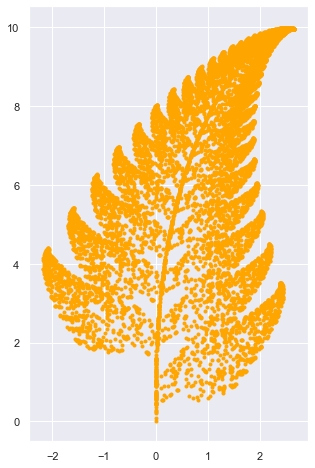

In [29]:
plt.figure(figsize = [5,8])
for item in U:
    plt.scatter(item[0],item[1],color = 'orange',marker = '.')
plt.show()

### Reference:
[1] [Barnsley fern](https://en.wikipedia.org/wiki/Barnsley_fern)